# Exploring Relations between SNAP benefits and Health Insurance

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

## SNAP State Rates

In [2]:
snap_state = pd.read_csv("SNAP-state-rates.csv")

In [3]:
snap_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                53 non-null     object 
 1   All eligible people  51 non-null     float64
 2   Working poor people  51 non-null     float64
 3   Elderly people       51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


In [4]:
snap_state.describe()

,All eligible people,Working poor people,Elderly people
count,51.000000,51.000000,51.000000
mean,83.156863,74.666667,40.901961
std,10.418009,10.955668,11.609057
min,55.000000,38.000000,19.000000
25%,77.000000,69.000000,33.000000
50%,83.000000,75.000000,40.000000
75%,90.500000,80.500000,47.000000
max,100.000000,99.000000,70.000000


In [5]:
snap_state.set_index("State")
snap_state_vars = snap_state.columns[1:]

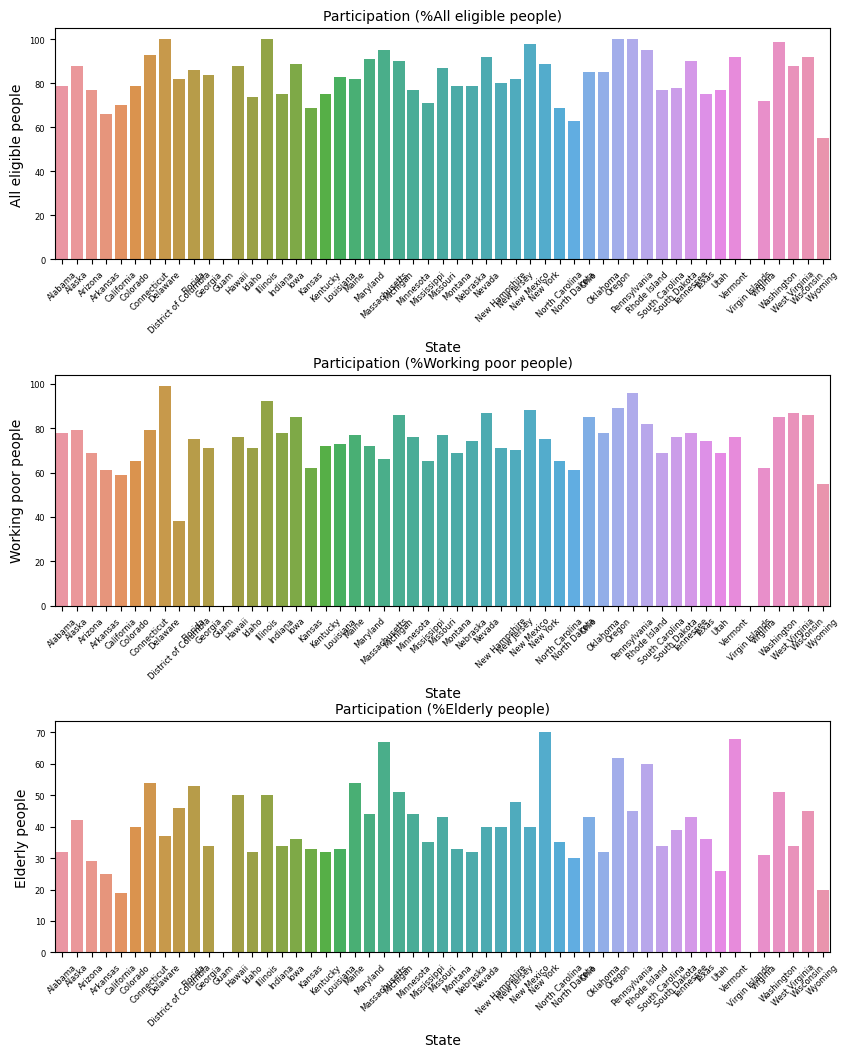

In [6]:
#Barplots
fig, axs = plt.subplots(nrows=len(snap_state_vars), ncols=1)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(10, 12)
for ax, var in zip(axs.flat,snap_state_vars):
    ax.set_title(label=f"Participation (%{var})", fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=6)
    ax.tick_params(axis='y', labelsize=6)
    sns.barplot(snap_state, x="State", y=var, ax=ax)

## ACS S2701: Health Insurance Coverage Status

In [7]:
health_state = pd.read_csv("HealthCoverageFull.csv", sep=",", skiprows=1)

In [8]:
vars_drop = []
selected_vars = []

for var in health_state.columns:

    if var.startswith("Annotation"):
        vars_drop.append(var)
    elif var.startswith("Margin"):
        vars_drop.append(var)
    elif("Estimate!!Total!!Civilian noninstitutionalized population") in var:
        vars_drop.append(var)
    elif "Estimate!!Uninsured!!Civilian noninstitutionalized population" in var:
        vars_drop.append(var)
    elif "Estimate!!Insured!!Civilian noninstitutionalized population" in var:    
        vars_drop.append(var)
    elif "Estimate!!Percent Uninsured!!Civilian noninstitutionalized population" in var:    
        vars_drop.append(var)
    else:
        selected_vars.append(var)

len(selected_vars)

64

In [9]:
health_state.drop(vars_drop, axis=1, inplace=True)
health_state.shape

(52, 64)

In [10]:
health_state.columns = health_state.columns.str.replace("!","")
health_state.columns = health_state.columns.str.replace("EstimatePercent InsuredCivilian noninstitutionalized population","Insured(%) ")

In [11]:
snap_health = pd.merge(snap_state,health_state,left_on="State",right_on="Geographic Area Name")

In [12]:
BDT_states = ["Colorado", "Maryland", "Michigan", "New York", "North Carolina", "Pennsylvania",  "Carolina"] 
additional_states = ["Florida", "Mississippi", "Texas", "Alabama", "Tennessee", "Louisiana", "Oklahoma"]

def BDT_identifier(w):
    if w in BDT_states:
        return 1
    elif w in additional_states:
        return 2
    else:
        return 0  

snap_health["BDT_state"] = snap_health["State"].apply(BDT_identifier)


In [13]:
BDT_states_labels = {"0":"Non BDT", "1":"BDT", "2":"Additional"}
snap_health["BDT_state"] = snap_health["BDT_state"].map(BDT_states_labels)

In [14]:
sns.scatterplot(data=snap_health, x="All eligible people", 
                y="Insured(%)-HOUSEHOLD INCOME (IN 2020 INFLATION-ADJUSTED DOLLARS)Total household populationUnder $25,000", 
                hue="BDT_state")
plt.title("Health Insurance vs SNAP Participation", fontsize=10)
plt.xlabel("SNAP Participation (% all eligible people)", fontsize=8)
plt.ylabel("Health Insurance (% household with income under $25,000)", fontsize=8)

ValueError: Could not interpret value `Insured(%)-HOUSEHOLD INCOME (IN 2020 INFLATION-ADJUSTED DOLLARS)Total household populationUnder $25,000` for parameter `y`